Exercícios de Revisão A2
--
Professor: Renato Rocha Souza  
--

In [118]:
import itertools
import random
from collections import Counter
import re
import string

import pymysql
import sqlite3
import getpass

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas.io.sql as psql

%matplotlib inline

### Parte I - Pandas

Para o Dataframe abaixo, resolva as seguintes tarefas:

In [98]:
df_zoo = pd.read_csv('../Dados/zoo.csv')
df_zoo.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


In [100]:
df_zoo.loc[:2,['animal','hair']]

,animal,hair
0,aardvark,True
1,antelope,True
2,bass,False


In [101]:
df_zoo.iloc[0:2,0:2]

,animal,hair
0,aardvark,True
1,antelope,True


1 - Crie uma série somente com os nomes dos animais (primeira coluna)

In [3]:
type(df_zoo.animal)

pandas.core.series.Series

2 - Transforme os campos booleanos True/False em strings "True"/"False"  
Veja as dicas [aqui](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) e [aqui](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.applymap.html)  

Obs: O Pandas já inferiu que as variáveis originais são de tipo booleano, mas como você faria se não o fossem; se fossem strings, por exemplo?  

In [65]:
df_zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal      101 non-null object
hair        101 non-null bool
feathers    101 non-null bool
eggs        101 non-null bool
milk        101 non-null bool
airborne    101 non-null bool
aquatic     101 non-null bool
predator    101 non-null bool
toothed     101 non-null bool
backbone    101 non-null bool
breathes    101 non-null bool
venomous    101 non-null bool
fins        101 non-null bool
legs        101 non-null int64
tail        101 non-null bool
domestic    101 non-null bool
catsize     101 non-null bool
type        101 non-null object
dtypes: bool(15), int64(1), object(2)
memory usage: 3.9+ KB


In [66]:
type(df_zoo.hair[0])

numpy.bool_

In [71]:
df_zoo.hair = df_zoo.hair.apply(lambda x:str(x))
df_zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal      101 non-null object
hair        101 non-null object
feathers    101 non-null bool
eggs        101 non-null bool
milk        101 non-null bool
airborne    101 non-null bool
aquatic     101 non-null bool
predator    101 non-null bool
toothed     101 non-null bool
backbone    101 non-null bool
breathes    101 non-null bool
venomous    101 non-null bool
fins        101 non-null bool
legs        101 non-null int64
tail        101 non-null bool
domestic    101 non-null bool
catsize     101 non-null bool
type        101 non-null object
dtypes: bool(14), int64(1), object(3)
memory usage: 4.6+ KB


In [72]:
df_zoo.feathers = df_zoo.feathers.map({True:'Verdadeiro', False:'Falso'})
df_zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal      101 non-null object
hair        101 non-null object
feathers    101 non-null object
eggs        101 non-null bool
milk        101 non-null bool
airborne    101 non-null bool
aquatic     101 non-null bool
predator    101 non-null bool
toothed     101 non-null bool
backbone    101 non-null bool
breathes    101 non-null bool
venomous    101 non-null bool
fins        101 non-null bool
legs        101 non-null int64
tail        101 non-null bool
domestic    101 non-null bool
catsize     101 non-null bool
type        101 non-null object
dtypes: bool(13), int64(1), object(4)
memory usage: 5.3+ KB


In [92]:
df_zoo.loc[:, df_zoo.dtypes == bool].columns

Index(['eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed',
       'backbone', 'breathes', 'venomous', 'fins', 'tail', 'domestic',
       'catsize'],
      dtype='object')

In [91]:
booleanas = df_zoo.loc[:, df_zoo.dtypes == bool].columns
df_zoo[booleanas].head()

,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,tail,domestic,catsize
0,False,True,False,False,True,True,True,True,False,False,False,False,True
1,False,True,False,False,False,True,True,True,False,False,True,False,True
2,True,False,False,True,True,True,True,False,False,True,True,False,False
3,False,True,False,False,True,True,True,True,False,False,False,False,True
4,False,True,False,False,True,True,True,True,False,False,True,False,True


In [95]:
df_zoo[booleanas] = df_zoo[booleanas].applymap(lambda x:int(x))
df_zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal      101 non-null object
hair        101 non-null object
feathers    101 non-null object
eggs        101 non-null int64
milk        101 non-null int64
airborne    101 non-null int64
aquatic     101 non-null int64
predator    101 non-null int64
toothed     101 non-null int64
backbone    101 non-null int64
breathes    101 non-null int64
venomous    101 non-null int64
fins        101 non-null int64
legs        101 non-null int64
tail        101 non-null int64
domestic    101 non-null int64
catsize     101 non-null int64
type        101 non-null object
dtypes: int64(14), object(4)
memory usage: 14.3+ KB


3 - Crie um novo dataframe somente com os Mamíferos

In [6]:
df_zoo[df_zoo.type == 'mammal']

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
5,buffalo,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
6,calf,True,False,False,True,False,False,False,True,True,True,False,False,4,True,True,True,mammal
9,cavy,True,False,False,True,False,False,False,True,True,True,False,False,4,False,True,False,mammal
10,cheetah,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
17,deer,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
19,dolphin,False,False,False,True,False,True,True,True,True,True,False,True,0,True,False,True,mammal


4 - Crie um gráfico com os números de patas por animais  
Veja as dicas [aqui](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.html)  

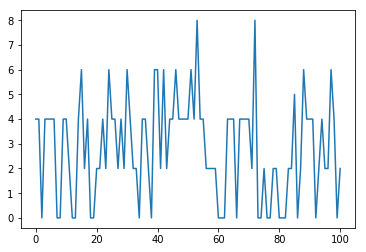

In [7]:
df_zoo.legs.plot()

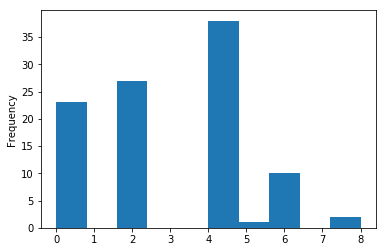

In [8]:
df_zoo.legs.plot(kind='hist')

In [9]:
df_zoo[df_zoo.legs == 5]

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
85,starfish,False,False,True,False,False,True,True,False,False,False,False,False,5,False,False,False,invertebrate


5 - crie uma tabela no banco alunos a partir do dataframe  
ver referência [aqui](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html)

In [10]:
conn = sqlite3.connect('tabela_zoo')

In [11]:
df_zoo.to_sql('tabela_zoo', con=conn)

In [12]:
cur = conn.cursor()

In [18]:
cur.execute("SELECT * FROM sqlite_master;")
for r in cur.fetchall():
    print(r)

('table', 'tabela_zoo', 'tabela_zoo', 2, 'CREATE TABLE "tabela_zoo" (\n"index" INTEGER,\n  "animal" TEXT,\n  "hair" INTEGER,\n  "feathers" INTEGER,\n  "eggs" INTEGER,\n  "milk" INTEGER,\n  "airborne" INTEGER,\n  "aquatic" INTEGER,\n  "predator" INTEGER,\n  "toothed" INTEGER,\n  "backbone" INTEGER,\n  "breathes" INTEGER,\n  "venomous" INTEGER,\n  "fins" INTEGER,\n  "legs" INTEGER,\n  "tail" INTEGER,\n  "domestic" INTEGER,\n  "catsize" INTEGER,\n  "type" TEXT\n)')
('index', 'ix_tabela_zoo_index', 'tabela_zoo', 3, 'CREATE INDEX "ix_tabela_zoo_index"ON "tabela_zoo" ("index")')


In [13]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

[('tabela_zoo',)]


In [14]:
cur.execute("SELECT * FROM tabela_zoo;")
for r in cur.fetchmany(12):
    print(r)

(0, 'aardvark', 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 0, 0, 1, 'mammal')
(1, 'antelope', 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1, 'mammal')
(2, 'bass', 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 'fish')
(3, 'bear', 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 0, 0, 1, 'mammal')
(4, 'boar', 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1, 'mammal')
(5, 'buffalo', 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1, 'mammal')
(6, 'calf', 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 1, 1, 'mammal')
(7, 'carp', 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 'fish')
(8, 'catfish', 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 'fish')
(9, 'cavy', 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 0, 1, 0, 'mammal')
(10, 'cheetah', 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1, 'mammal')
(11, 'chicken', 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 'bird')


In [15]:
new_df = pd.read_sql_query("SELECT * FROM tabela_zoo;", conn)
new_df.head()

,index,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
1,1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,mammal
2,2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,fish
3,3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
4,4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,mammal


### Parte 2 - Shell Linux

Usando comandos do Shell, abra o arquivo ../Dados/DomCasmurroMachadoAssis.txt e resolva as seguintes tarefas:

1 - [Ordene as palavras do texto nas formas abaixo](https://jupyterhub.namd.mat.br/user/rsouza/notebooks/FGV_Programming_Languages/Bash/Unix4Poets.ipynb):
+ ordem ascii
+ ordem alfabética
+ ordem de "rima"

In [48]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | rev | sort | rev | uniq -c | sed -n '110,130p'

      3 dada
      1 assobradada
      1 mandada
      1 prendada
      2 guardada
      1 mudada
      1 lisongeada
      1 creada
      3 fada
      1 almofada
      2 socegada
      2 chegada
      1 obrigada
      2 castigada
      1 zangada
      1 engasgada
      3 madrugada
      1 trabalhada
      1 palhada
      1 atrapalhada
      1 enxovalhada


2 - Quantas palavras maiúsculas distintas há no texto?

3 - Quantas palavras há com apenas uma; com apenas duas; e com apenas 3 vogais?

4 - Qual a sequência de comandos para criar um arquivo com os bigramas e suas contagens?

### Parte 3 - Expressões Regulares

1 - Repita os exercícios 1 a 4 da parte 2 utilizando [Python](https://docs.python.org/3/library/re.html)

In [114]:
with open('../Dados/DomCasmurroMachadoAssis.txt', 'r') as f:
    texto = f.read()
print(texto[0:500])

﻿The Project Gutenberg EBook of Dom Casmurro, by Machado de Assis

This eBook is for the use of anyone anywhere in the United States and most
other parts of the world at no cost and with almost no restrictions
whatsoever.  You may copy it, give it away or re-use it under the terms of
the Project Gutenberg License included with this eBook or online at
www.gutenberg.org.  If you are not located in the United States, you'll have
to check the laws of the country where you are located before using th


In [119]:

palavras = texto.split()
palavras = [p.strip(string.punctuation) for p in palavras]
palavras[0:10]

['\ufeffThe',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'Dom',
 'Casmurro',
 'by',
 'Machado',
 'de']

In [124]:
maiusculas = re.findall(r'\s[$A-Z]{1}[a-z]*', texto)
maiusculas

[' Project',
 ' Gutenberg',
 ' E',
 ' Dom',
 ' Casmurro',
 ' Machado',
 ' Assis',
 '\nThis',
 ' United',
 ' States',
 ' You',
 ' Project',
 ' Gutenberg',
 ' License',
 ' If',
 ' United',
 ' States',
 '\nTitle',
 ' Dom',
 ' Casmurro',
 '\nAuthor',
 ' Machado',
 ' Assis',
 '\nRelease',
 ' Date',
 ' October',
 '\nLanguage',
 ' Portuguese',
 ' S',
 ' O',
 ' T',
 ' P',
 ' G',
 ' E',
 ' D',
 ' C',
 '\nProduced',
 ' Laura',
 ' Natal',
 ' Rodriguez',
 ' Marc',
 ' D',
 ' Free',
 '\nLiterature',
 ' M',
 ' Bibliotheca',
 ' Nacional',
 ' Digital',
 ' Brasil',
 '\nD',
 ' C',
 '\nP',
 '\nM',
 ' D',
 ' A',
 '\nD',
 ' A',
 ' B',
 '\nH',
 ' G',
 ' L',
 '\nR',
 ' M',
 ' C',
 '\nR',
 ' D',
 ' J',
 ' R',
 ' D',
 ' S',
 '\nP',
 '\nI',
 '\nDo',
 '\nUma',
 ' Engenho',
 ' Novo',
 ' Central',
 ' Comprimentou',
 ' A',
 ' Succedeu',
 '\nVi',
 ' No',
 ' Casmurro',
 ' Os',
 ' Nem',
 ' Contei',
 '\nCasmurro',
 ' Petropolis',
 ' Dom',
 '\nCasmurro',
 ' Rhenania',
 '\nEngenho',
 ' Novo',
 ' Dom',
 '\nCasmurro',
 '\nN

### Parte 4 - Bancos de dados

In [32]:
p = getpass.getpass()
conn = pymysql.connect(host='127.0.0.1', #localhost
                       port=3306, 
                       user='aluno', 
                       passwd=p, 
                       db='SQLExample1')
cur = conn.cursor()

········


In [33]:
cur.execute('use SQLExample1;')
cur.execute('show tables;')
for r in cur.fetchall():
    print(r)

('account',)
('branch',)
('business',)
('customer',)
('department',)
('employee',)
('individual',)
('officer',)
('product',)
('product_type',)
('transaction',)


In [34]:
cur.execute('describe account;')
for r in cur.fetchall():
    print(r)

('account_id', 'int(10) unsigned', 'NO', 'PRI', None, 'auto_increment')
('product_cd', 'varchar(10)', 'NO', 'MUL', None, '')
('cust_id', 'int(10) unsigned', 'NO', 'MUL', None, '')
('open_date', 'date', 'NO', '', None, '')
('close_date', 'date', 'YES', '', None, '')
('last_activity_date', 'date', 'YES', '', None, '')
('status', "enum('ACTIVE','CLOSED','FROZEN')", 'YES', '', None, '')
('open_branch_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('open_emp_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('avail_balance', 'float(10,2)', 'YES', '', None, '')
('pending_balance', 'float(10,2)', 'YES', '', None, '')


In [35]:
cur.execute('select * from account limit 5;')
for r in cur.fetchall():
    print(r)

(1, 'CHK', 1, datetime.date(2000, 1, 15), None, datetime.date(2005, 1, 4), 'ACTIVE', 2, 10, 1057.75, 1057.75)
(2, 'SAV', 1, datetime.date(2000, 1, 15), None, datetime.date(2004, 12, 19), 'ACTIVE', 2, 10, 500.0, 500.0)
(3, 'CD', 1, datetime.date(2004, 6, 30), None, datetime.date(2004, 6, 30), 'ACTIVE', 2, 10, 3000.0, 3000.0)
(4, 'CHK', 2, datetime.date(2001, 3, 12), None, datetime.date(2004, 12, 27), 'ACTIVE', 2, 10, 2258.02, 2258.02)
(5, 'SAV', 2, datetime.date(2001, 3, 12), None, datetime.date(2004, 12, 11), 'ACTIVE', 2, 10, 200.0, 200.0)


In [36]:
cur.execute('describe product;')
for r in cur.fetchall():
    print(r)

('product_cd', 'varchar(10)', 'NO', 'PRI', None, '')
('name', 'varchar(50)', 'NO', '', None, '')
('product_type_cd', 'varchar(10)', 'NO', 'MUL', None, '')
('date_offered', 'date', 'YES', '', None, '')
('date_retired', 'date', 'YES', '', None, '')


In [37]:
cur.execute('select * from product;')
for r in cur.fetchall():
    print(r)

('AUT', 'auto loan', 'LOAN', datetime.date(2000, 1, 1), None)
('BUS', 'business line of credit', 'LOAN', datetime.date(2000, 1, 1), None)
('CD', 'certificate of deposit', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('CHK', 'checking account', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('MM', 'money market account', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('MRT', 'home mortgage', 'LOAN', datetime.date(2000, 1, 1), None)
('SAV', 'savings account', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('SBL', 'small business loan', 'LOAN', datetime.date(2000, 1, 1), None)


In [38]:
cur.execute('describe product_type;')
for r in cur.fetchall():
    print(r)

('product_type_cd', 'varchar(10)', 'NO', 'PRI', None, '')
('name', 'varchar(50)', 'NO', '', None, '')


In [39]:
cur.execute('select * from product_type;')
for r in cur.fetchall():
    print(r)

('ACCOUNT', 'Customer Accounts')
('INSURANCE', 'Insurance Offerings')
('LOAN', 'Individual and Business Loans')


In [40]:
cur.execute('describe employee;')
for r in cur.fetchall():
    print(r)

('emp_id', 'smallint(5) unsigned', 'NO', 'PRI', None, 'auto_increment')
('fname', 'varchar(20)', 'NO', '', None, '')
('lname', 'varchar(20)', 'NO', '', None, '')
('start_date', 'date', 'NO', '', None, '')
('end_date', 'date', 'YES', '', None, '')
('superior_emp_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('dept_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('title', 'varchar(20)', 'YES', '', None, '')
('assigned_branch_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')


In [41]:
cur.execute('select * from employee limit 10;')
for r in cur.fetchall():
    print(r)

(1, 'Michael', 'Smith', datetime.date(2001, 6, 22), None, None, 3, 'President', 1)
(2, 'Susan', 'Barker', datetime.date(2002, 9, 12), None, 1, 3, 'Vice President', 1)
(3, 'Robert', 'Tyler', datetime.date(2000, 2, 9), None, 1, 3, 'Treasurer', 1)
(4, 'Susan', 'Hawthorne', datetime.date(2002, 4, 24), None, 3, 1, 'Operations Manager', 1)
(5, 'John', 'Gooding', datetime.date(2003, 11, 14), None, 4, 2, 'Loan Manager', 1)
(6, 'Helen', 'Fleming', datetime.date(2004, 3, 17), None, 4, 1, 'Head Teller', 1)
(7, 'Chris', 'Tucker', datetime.date(2004, 9, 15), None, 6, 1, 'Teller', 1)
(8, 'Sarah', 'Parker', datetime.date(2002, 12, 2), None, 6, 1, 'Teller', 1)
(9, 'Jane', 'Grossman', datetime.date(2002, 5, 3), None, 6, 1, 'Teller', 1)
(10, 'Paula', 'Roberts', datetime.date(2002, 7, 27), None, 4, 1, 'Head Teller', 2)


1 - Na tabela "account", quais os valores médio, mínimo e máximo de "avail_balance"?

2 - Quais registros na tabela "account" estão acima da média de "avail_balance"?

3 - Na tabela "account", quais as 3 datas mais recentes e as 3 datas mais antigas ("open_date")?

4 - Para cada elemento na tabela "product", exiba o nome completo do "product_type_cd" (tabela "product_type")

In [47]:
cur.execute('use SQLExample1;')

0

In [53]:
q = '''
SELECT p.name, t.name FROM product AS p 
JOIN product_type AS t
ON p.product_type_cd = t.product_type_cd
;
'''

cur.execute(q)
for r in cur.fetchall():
    print(r)

('auto loan', 'Individual and Business Loans')
('business line of credit', 'Individual and Business Loans')
('certificate of deposit', 'Customer Accounts')
('checking account', 'Customer Accounts')
('money market account', 'Customer Accounts')
('home mortgage', 'Individual and Business Loans')
('savings account', 'Customer Accounts')
('small business loan', 'Individual and Business Loans')


5 - Quantos empregados ("employees") possuem a letra "e" em seus nomes? E quantos tem sobrenomes que terminam com "r"? 

6 - Quais são os títulos ("title") possíveis para os empregados ("employees")? 

7 - Quantos empregados ("employees") estão a exatamente dois níveis abaixo do presidente? 

In [102]:
cur.execute('use SQLExample1;')

0

In [107]:
cur.execute('describe employee;')
for r in cur.fetchall():
    print(r)

('emp_id', 'smallint(5) unsigned', 'NO', 'PRI', None, 'auto_increment')
('fname', 'varchar(20)', 'NO', '', None, '')
('lname', 'varchar(20)', 'NO', '', None, '')
('start_date', 'date', 'NO', '', None, '')
('end_date', 'date', 'YES', '', None, '')
('superior_emp_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('dept_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('title', 'varchar(20)', 'YES', '', None, '')
('assigned_branch_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')


In [110]:
q = '''
SELECT * FROM employee WHERE superior_emp_id IN 
(SELECT emp_id FROM employee WHERE superior_emp_id = 1)
OR 
superior_emp_id = 1
;
'''

cur.execute(q)
for r in cur.fetchall():
    print(r)

(2, 'Susan', 'Barker', datetime.date(2002, 9, 12), None, 1, 3, 'Vice President', 1)
(3, 'Robert', 'Tyler', datetime.date(2000, 2, 9), None, 1, 3, 'Treasurer', 1)
(4, 'Susan', 'Hawthorne', datetime.date(2002, 4, 24), None, 3, 1, 'Operations Manager', 1)


8 - Na tabela "account", quais os valores médio, mínimo e máximo de "avail_balance" por tipo de 'product_cd' ?

9 - Na tabela "transaction", há quantos registros por ano ("txn_date")?

10 - Você é dono de uma loja de automóveis. Crie tabelas no banco "alunos" para representar os carros de seu pátio, os modelos de automóveis, os clientes e as compras realizadas. 

In [59]:
cur.execute('use alunos;')
cur.execute('show tables;')
for r in cur.fetchall():
    print(r)

In [63]:
q = '''CREATE TABLE IF NOT EXISTS carros
       (text VARCHAR(200) DEFAULT NULL,
        number INT DEFAULT NULL)
        ENGINE=MyISAM DEFAULT CHARSET='utf8';'''

cur.execute(q)

/usr/local/lib/python3.5/dist-packages/pymysql/cursors.py:166: Warning: (1050, "Table 'carros' already exists")
  result = self._query(query)


0

In [64]:
cur.execute('show tables;')
for r in cur.fetchall():
    print(r)

('carros',)


11 - Crie uma lista no Python com todos os nomes e sobrenomes em strings únicas, a partir da tabela "individual"  

12 - A partir da tabela "individual", crie um dicionário no Python tendo os nomes e sobrenomes em strings únicas como chaves e os anos das datas como valores.

13 - Utilizando Python, crie um banco de dados no sqlite que guarde a seguinte estrutura, demonstrada no dataframe do Pandas:  
Use os tipos de dados mais adequados.  

Veja:  
https://sqlite.org/datatype3.html    
https://sqlite.org/autoinc.html  
https://www.tutorialspoint.com/sqlite/sqlite_update_query.htm  

In [5]:
df_tf = pd.read_excel('../Dados/votesurvey.xls')
df_tf.index.name = 'id'
df_tf.head(10)

,Gender,Age,Salary before Stern,Expected salary,Candidate
id,,,,,
0,Male,27,60000,110000,Bush
1,Male,30,125000,125000,Bush
2,Male,27,50000,120000,Bush
3,Male,26,56000,100000,Bush
4,Male,27,82000,100000,Bush
5,Male,32,150000,150000,Bush
6,Female,24,55000,100000,Bush
7,Male,30,110000,150000,Bush
8,Male,26,48000,80000,Bush


14 - Conecte ao banco SQLite "iris_database.sqlite"e responda, demonstrando os comandos SQL apropriados:  

a) Há quantas "Species" diferentes na tabela "iris"?  
b) Quantos registros totais há na tabela "iris"?  

Considerando a superfície das pétalas e sépalas como retangular, responda:  

c) Qual espécie ("Species") contém, em média, a maior área de pétalas?  
d) Qual espécie ("Species") contém, em média, a maior área total (pétalas e sépalas)?  

(Por curiosidade, as espécies de Iris contém 3 pétalas e 3 sépalas)  

In [6]:
conn = sqlite3.connect('../Dados/iris_database.sqlite')
cur = conn.cursor()

15 - Conecte ao banco Python/Dados/chinook.sqlite e responda:

a) Utilizando um comando SQL e as tabelas "invoices", "invoice_items", "customers" e "tracks", mostre quais as faixas compradas por clientes que têm o primeiro nome começando com a letra "M".  
b) Quais clientes contêm a letra "o" tanto no nome como no sobrenome?  
c) Crie um histograma de faixas ("tracks") mais compradas, usando o matplotlib.  
d) Qual o cliente ("customers") que teve gasto médio em compras ("invoices") o valor mais próximo do valor médio do total de compras de todos os clientes?  
e) Escreva um script em Python + SQL para construir um dicionário tendo os nomes dos artistas ("artists") como chaves e uma lista dos álbuns ("albuns") respectivos como valores.

In [ ]:
conn = sqlite3.connect('../Dados/chinook.sqlite')
cur = conn.cursor()